<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Einführung Machine Learning
### Sommersemester 2022
Prof. Dr. Heiner Giefers

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Lineare Regression

Der einfachste Fall der Lineraen Regression ist die Vorhersage einer (*abhängigen*) Variablen durch **eine** *unabhängige* Variable.
Dieser Spezialfall wird daher auch *einfache Lineare Regression* (ELR) oder *univariate Lineare Regression* genannt.

Wir wollen die ELR an einem einfachen Datensatz erproben.
Dazu generieren wir uns $N=30$ Datenpunkte im Bereich $x\in[0,10]$.
Die $y$-Werte sollen grob entlang einer geraden liegen.
Wir wählen für die gerade eine Steigung von $2$ und den Achsenabschnitt $-5$.

Natürlich sollen die Punkte nicht alle **auf** dieser Geraden liegen.
Daher fügen wir noch einen kleinen *Störfaktor* ein.
Wir addieren zu jedem $y$-Wert einen Wert aus dem Bereich $[-1,1]$.

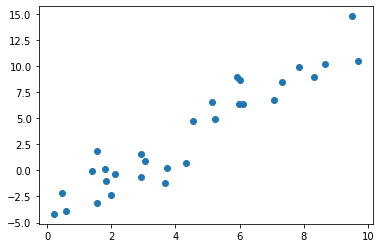

In [3]:
np.random.seed(42)
N = 30
x = 10 * np.random.rand(N)
y = 2 * x - 5 + 2*np.random.randn(N)
plt.scatter(x, y);
plt.show()

Wir können nun die *Scikit-Learn* Klasse `LinearRegression` verwenden, um ein ELR Modell für den Datensatz aufzustellen.
Mit der `fit`-Methode passen wir das Modell an den Datensatz an.

*Hinweis:* Die `fit`-MEthode erwartet ein 2-dimensionales Feld als ersten Parameter. Unser `x` ist aber ein eindimensionales Array. Wir ändern daher mit der `reshape`-Methode die Dimension von `x` vor dem Aufruf von `fit` um.

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.reshape((-1,1))
model.fit(x, y)

print("Steigung:       ", model.coef_[0])
print("Achsenabschnitt:", model.intercept_)



Steigung:        1.7213842056621573
Achsenabschnitt: -4.142057444197555


Wir können nun die Modellfunktion plotten indem wir zunächst einige neue Datenpunkte erzeugen (`xplot`) und für diese Punkte den $y$-Wert über die `predict`-Methode schätzen.

Wir sehen, dass die Gerade die blauen Datenpukte unseres Trainingsdatensatzes sehr gut generalisiert.

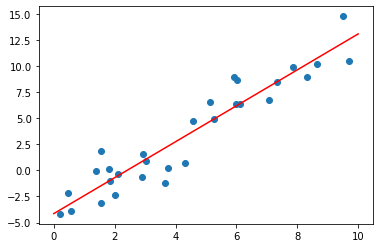

In [5]:
xplot = np.linspace(0, 10, 20).reshape((-1,1))
yplot = model.predict(xplot)

plt.scatter(x, y)
plt.plot(xplot, yplot, c='r')
plt.show()

Der ``LinearRegression`` Schätzer kann nicht nur auf univariate Probleme angewendet werden, sondern er funktioniert auch für mehrere unabhängige Variable.
Die Modellfunktion einer allgemeinen (*multivariaten*) lineren Regression lautet:
$$
\hat{y} = a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n
$$

Dabei sind die $x_i$ die einzelnen unabhängigen Variablen, die Werte $a_i$ sind die zu trainierenden Modellparameter.
Der Parameter $a_0$, den wir beim univariaten Modell *Achsenabschnitt* genannt haben, heißt auch *Bias*-Parameter.
Es ist der einzige Parameter, der unabhängig von den Variablen ins Modell eingeht.

$\hat{y}$ ist der geschätzte Wert der Zielvariablen für den Vektor $\textbf{x}$.
Für unsere Trainingsdaten kennen wir den jeweiligen exakten Wert $y$.
Über einen Vergleich von $\hat{y}$ und $y$ kann man feststellen, wie *gut* die Schaätzung der Modellfunktion ist.

In [6]:
np.random.seed(123)
N = 30
X = 10 * np.random.rand(N, 3)
noise = np.random.normal(0, 0.5, (N,3))
y = 0.5 + np.dot(X+noise, [1.5, -2., 1.]) + 0.5*np.random.randn(1)

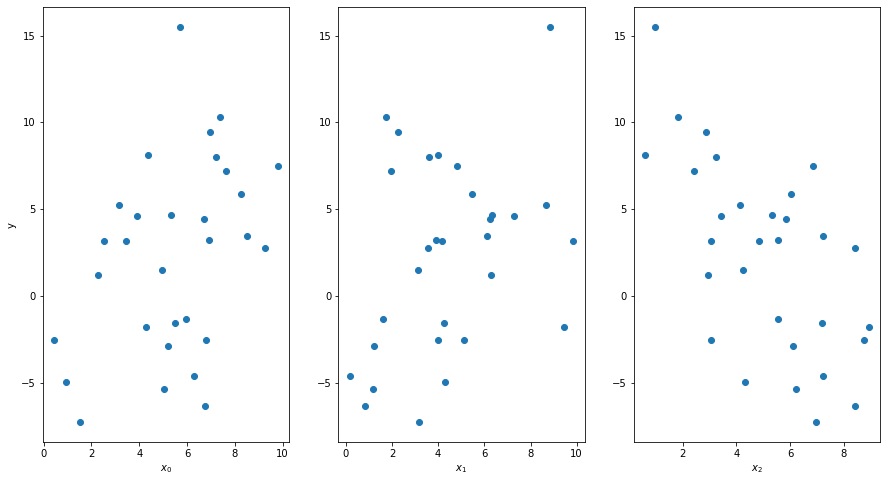

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15,8))
axs[0].scatter(X[:,0], y)
axs[1].scatter(X[:,2], y)
axs[2].scatter(X[:,1], y)
axs[0].set_ylabel('y')
axs[0].set_xlabel(r'$x_0$')
axs[1].set_xlabel(r'$x_1$')
axs[2].set_xlabel(r'$x_2$')
plt.show()

**Aufgabe:** Trainieren Sie ein `LinearRegression` Modell mit dem Datensatz `X` und geben Sie die gelerneten Modellparameter $a_0$ bis $a_3$ aus.

In [14]:
model = LinearRegression().fit(X, y)
model.coef_

array([ 1.71096436, -1.9269493 ,  0.99236897])

### California Housing

Im folgenden Beispiel verwenden wir einen Datensatz zu Immobilienpreisen in den USA für die Demonstration von Regressions-Aufgaben.
Die Daten wurden 1990 bei der US-Volkszählung gesammelt und beschreiben Eigenschaften der Wohnverhältnisse in Bezirken des Bundesstaats Kalifornien.
Die Zielvariable ist der Median des Hauswertes, angegeben in Hunderttausend Dollar.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import fetch_california_housing

#print(dataset.DESCR)
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Der Datensatz enthält folgende Merkmale:
- **MedInc:** Median des Einkommens im Bezirk
- **HouseAge:** Median des Hausalters im Bezirk
- **AveRooms:** Durchschnittliche Anzahl der Zimmer pro Haushalt
- **AveBedrms:** Durchschnittliche Anzahl der Schlafzimmer pro Haushalt
- **Population:** Anzahl Bewohner*innen im Bezirk
- **AveOccup:** Durchschnittliche Anzahl der Haushaltsmitglieder
- **Latitude:** Breitengrad des Bezirks
- **Longitude:** Längengrad des Bezirks

Die Zielvariable `target` ist der Preis der jeweiligen Häuser in Hunderttausend US-Dollar

In [16]:
preise = dataset.target
print(f"Der Wert der Häuser reicht von {int(np.min(preise)*100)} bis {int(np.max(preise)*100)} Tausend $")
print(f"Im Mittel kosten die Häuser {int(np.mean(preise)*100)} Tausend $")

Der Wert der Häuser reicht von 14 bis 500 Tausend $
Im Mittel kosten die Häuser 206 Tausend $


**Aufgabe:** In der folgenden Code-Zelle teilen wir den Datensatz auf, in einen Trainings- und in einen Testdatensatz.
Verwenden Sie die Trainingsdaten, um ein lineares Regressionsmodell zu trainieren.
Berechnen Sie damit eine Schätzung `y_vorhersage` für die Testdaten.
Danach berechnen wird den *mittleren absoluten Fehler* und überprüfen damit, wie gut unser Modell die Preise der Häuser schätzen kann.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=42)

y_vorhersage = None
model = LinearRegression().fit(X_train, y_train)
y_vorhersage = model.predict(X_test)

# Mean Average Error per Hand ausrechnen
mittlerer_fehler = np.sum(np.abs(y_vorhersage-y_test))/len(y_vorhersage)

print(f"Der mittlere Fehler der Vorhersage liegt bei {int(mittlerer_fehler*100)} Tausend $")
err_percent = mean_absolute_percentage_error(y_test, y_vorhersage)
print(f"Damit liegen wir im Mittel ca. {int(err_percent*100)}% daneben")

Der mittlere Fehler der Vorhersage liegt bei 52 Tausend $
Damit liegen wir im Mittel ca. 31% daneben


## Quellen:
[1] Jake VanderPlas, [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook), O'Reilly, 2016.\
[2] Wolf Riepl, [*Machine Learning mit R und caret: GBM optimieren (Gradient Boosting Machine)*](https://statistik-dresden.de/archives/14967), Artikel auf https://statistik-dresden.de,  Veröffentlicht am 23.01.2018 (zugegriffen am 27.04.2021)